# Demo 4: diffraction pattern of a double slit

This demo shows how to setup and validate a double slit experiment. 
When two parallel slits have a uniform current distribution, they will create a diffraction pattern on a screen above them. If the slits are separated along the x axis, this pattern has maxima at the following x co-ordinates:
$$
x_\mathrm{max} = \frac{m \lambda D}{d},
$$
where $m$ is the order of the diffraction peak, $\lambda$ the wavelength of the radiation, $D$ the distance between slits and detector screen and $d$ the distance between the two slits.

2026-02-22 17:49:48 - WARNING - System override set to True. 
2026-02-22 17:49:48 - INFO - Added plane slit1 to system. 
2026-02-22 17:49:48 - INFO - Added plane slit2 to system. 
2026-02-22 17:49:48 - INFO - Added plane detector to system. 
2026-02-22 17:49:48 - INFO - Translated element detector by ('0.000e+00', '0.000e+00', '1.000e+02') millimeters. 
2026-02-22 17:49:48 - WORK - *** Starting PO propagation *** 
2026-02-22 17:49:48 - WORK - Propagating U1 on slit1 to detector, propagation mode: EH. 
2026-02-22 17:49:48 - WORK - Hardware: running 256 CUDA threads per block. 
2026-02-22 17:49:48 - WORK - ... Calculating ... 
2026-02-22 17:49:50 - WORK - *** Finished: 1.479 seconds *** 
2026-02-22 17:49:50 - WORK - *** Starting PO propagation *** 
2026-02-22 17:49:50 - WORK - Propagating U2 on slit2 to detector, propagation mode: EH. 
2026-02-22 17:49:50 - WORK - Hardware: running 256 CUDA threads per block. 
2026-02-22 17:49:50 - WORK - ... Calculating ... 
2026-02-22 17:49:50 - WORK -

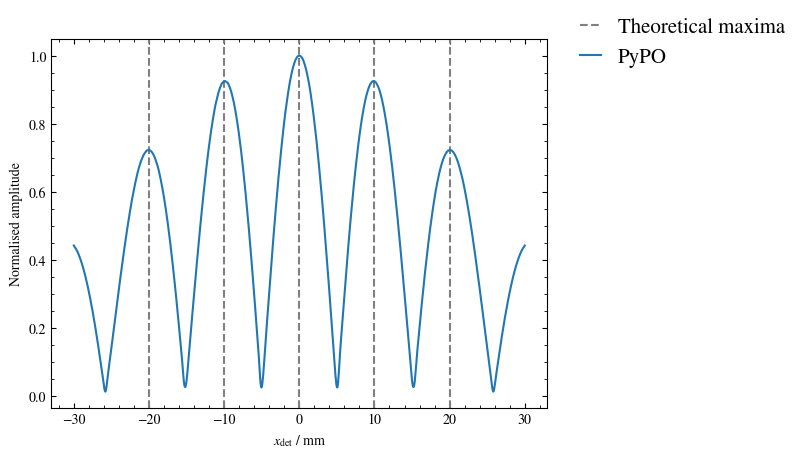

In [1]:
#%matplotlib widget
# Uncomment for interactive plots when running the notebook!
# Requires installation of the ipympl package

import numpy as np

from PyPO.System import System
from PyPO.Enums import FieldComponents, Modes, Scales, Units

import matplotlib.pyplot as pt

s = System()

# Setting up simulation parameters
d_slit = 1*Units.MM      # Distance between the two slits in mm
a_slit = 0.2*Units.MM    # Width of a slit in mm
lam = 0.1*Units.MM       # Wavelength of radiation
l_slit = 10*Units.MM     # Length of slit
D = 100*Units.MM         # Distance between slits and detector screen
max_order = 3   # Maximum number of peaks to plot

slit1 = {
        "name"      : "slit1",
        "gmode"     : "xy",
        "lims_x"    : np.array([-a_slit, a_slit]) / 2 - d_slit / 2,
        "lims_y"    : np.array([-l_slit, l_slit]) / 2,
        "gridsize"  : np.array([101, 101])
        }

slit2 = {
        "name"      : "slit2",
        "gmode"     : "xy",
        "lims_x"    : np.array([-a_slit, a_slit]) / 2 + d_slit / 2,
        "lims_y"    : np.array([-l_slit, l_slit]) / 2,
        "gridsize"  : np.array([101, 101])
        }

s.addPlane(slit1)
s.addPlane(slit2)

# Note that we make the detector really small along y.
# Because we are only interested in the cross section along x, we can ignore this part.
# This also means we can set the gridsize along y to a small value.
detector = {
        "name"      : "detector",
        "gmode"     : "xy",
        "lims_x"    : np.array([-30, 30]),
        "lims_y"    : np.array([-1, 1]),
        "gridsize"  : np.array([201, 3])
        }

s.addPlane(detector)
s.translateGrids("detector", np.array([0, 0, D]))

U1 = {
        "name"      : "U1",
        "lam"       : lam,
        }

U2 = {
        "name"      : "U2",
        "lam"       : lam,
        }

s.createUniformSource(U1, "slit1")
s.createUniformSource(U2, "slit2")

runPODict1 = {
        "s_current"     : "U1",
        "t_name"        : "detector",
        "name_EH"       : "det_U1",
        "mode"          : "EH"
        }

runPODict2 = {
        "s_current"     : "U2",
        "t_name"        : "detector",
        "name_EH"       : "det_U2",
        "mode"          : "EH"
        }

nums = np.arange(0, max_order)

loc_peaks = nums * lam * D / d_slit

s.runPO(runPODict1)
s.runPO(runPODict2)

s.mergeBeams("det_U1", "det_U2", merged_name="diff_pattern")

E, H, x, y = s.calcBeamCuts("diff_pattern", FieldComponents.Ex, center=False, align=False, scale=Scales.LIN)

fig, ax = pt.subplots(1,1)
for loc in loc_peaks[1:]:
    ax.axvline(loc, c="grey", ls="dashed")
    ax.axvline(-loc, c="grey", ls="dashed")
ax.axvline(loc_peaks[0], c="grey", ls="dashed", label="Theoretical maxima")

ax.plot(x, E, label="PyPO")
ax.set_xlabel(r"$x_\mathrm{det}$ / mm")
ax.set_ylabel("Normalised amplitude")
ax.legend(frameon=False, prop={'size': 15},handlelength=1, loc=(1.05,0.9))
pt.show()

There is good agreement between the simulated peaks and the theoretical ones. It should be noted that the expression presented in the beginning of this notebook does not take into account that the slits can interfere with themselves: due to their finite size, points on a single slit interfere with eachother and therefore cast a separate diffraction pattern on the screen.